# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [8]:
import numpy as np
import pandas as pd
train = pd.read_csv('.\\titanic\\train.csv')
test = pd.read_csv('.\\titanic\\test.csv')
#X_train=train.drop(['Survived'], axis=1)
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)
train.columns == test.columns
train['is_test'] = 0
test['is_test'] = 1
df = pd.concat([train, test])

In [9]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [10]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])
df_dummies.head()

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [11]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [12]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [14]:
columns = X_train.columns
X_train.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [16]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [20]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)
X_train_imputed.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
isMale        0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))
X_train_imputed_scaled.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306


In [68]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pca = PCA(n_components=2)

In [74]:
def calc_rezult(X,y):
    model = LogisticRegression()
    model.fit( X, y )
    #predictions = model.predict_proba( X )
    predictions = model.predict(X)
    return [accuracy_score(y_train, predictions), precision_score(y_train, predictions), recall_score(y_train, predictions) ]
calc_rezult(X2,y_train)

[0.8047138047138047, 0.7692307692307693, 0.7017543859649122]

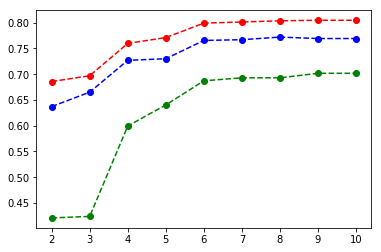

In [81]:
x_exp=np.arange(2,X_train_imputed_scaled.shape[1]);
y_acc_exp=np.zeros(x_exp.shape[0])
y_pre_exp=np.zeros(x_exp.shape[0])
y_rec_exp=np.zeros(x_exp.shape[0])
k=0;
for i in x_exp:
    pca=decomposition.PCA(n_components=x_exp[k])
    X2 = pca.fit_transform(X_train_imputed_scaled)
    y_acc_exp[k]=calc_rezult(X2,y_train)[0]
    y_pre_exp[k]=calc_rezult(X2,y_train)[1]
    y_rec_exp[k]=calc_rezult(X2,y_train)[2]
    k=k+1;
    
plt.plot(x_exp,y_acc_exp,'ro--')
plt.plot(x_exp,y_pre_exp,'bo--')
plt.plot(x_exp,y_rec_exp,'go--')
plt.show()

Как можно видеть на графике оптимальное (ближайшее наименьшее с близким к лучшему качеством) число главных компонент 6.